<a href="https://colab.research.google.com/github/anurag1210/ML_ZoomCamp_Capston_Project_2025/blob/main/Capston_1_MLZoomcamp2024_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
#Installing all the libraries
!pip install tensorflow opencv-python matplotlib

In [117]:
!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.3.0
audioread            

In [118]:
import tensorflow as tf
import os

In [119]:
#Acoid OOM errors by setting up GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [120]:
tf.config.list_physical_devices('GPU')

[]

In [121]:
!pwd

/root/.cache/kagglehub/datasets/balabaskar/wonders-of-the-world-image-classification/versions/2


In [122]:
!mkdir Image_Data

In [12]:
cd Image_Data

/content/Image_Data


In [13]:
!pwd

/content/Image_Data


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balabaskar/wonders-of-the-world-image-classification")

print("Path to dataset files:", path)

100%|██████████| 432M/432M [00:03<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/balabaskar/wonders-of-the-world-image-classification/versions/2


In [15]:
cd /root/.cache/kagglehub/datasets/balabaskar/wonders-of-the-world-image-classification/versions/2

/root/.cache/kagglehub/datasets/balabaskar/wonders-of-the-world-image-classification/versions/2


In [16]:
pwd

'/root/.cache/kagglehub/datasets/balabaskar/wonders-of-the-world-image-classification/versions/2'

In [17]:
ls -ltr

total 124
drwxr-xr-x 3 root root   4096 Jan 12 19:55 'Wonders of World'/
-rw-r--r-- 1 root root 121405 Jan 12 19:55  wonders_of_world_images.csv


In [18]:
cp -r 'Wonders of World'/  wonders_of_world_images.csv /content/Image_Data/

In [19]:
#Performing EDA on the dataset
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from collections import Counter

In [20]:
#The Below shows the number of images containing in each of the folders
dataset_path = '/content/Image_Data/Wonders of World/Wonders of World'
classes = os.listdir(dataset_path)
print(f"Classes: {classes}")
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class '{class_name}' has {num_images} images.")

Classes: ['machu_pichu', 'burj_khalifa', 'taj_mahal', 'roman_colosseum', 'great_wall_of_china', 'eiffel_tower', 'pyramids_of_giza', 'statue_of_liberty', 'venezuela_angel_falls', 'stonehenge', 'christ_the_reedemer', 'chichen_itza']
Class 'machu_pichu' has 393 images.
Class 'burj_khalifa' has 390 images.
Class 'taj_mahal' has 158 images.
Class 'roman_colosseum' has 394 images.
Class 'great_wall_of_china' has 392 images.
Class 'eiffel_tower' has 391 images.
Class 'pyramids_of_giza' has 372 images.
Class 'statue_of_liberty' has 238 images.
Class 'venezuela_angel_falls' has 251 images.
Class 'stonehenge' has 204 images.
Class 'christ_the_reedemer' has 323 images.
Class 'chichen_itza' has 340 images.


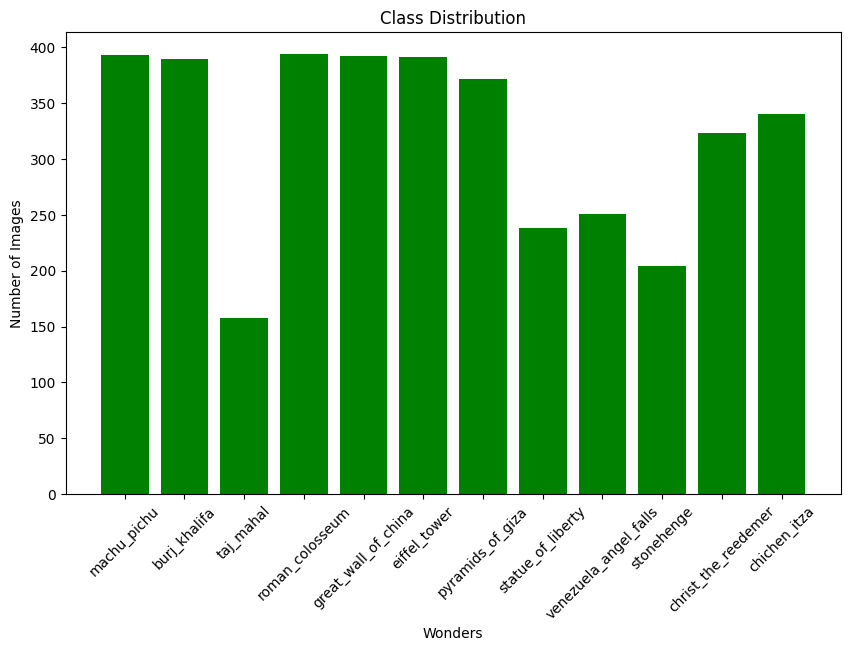

In [21]:
#Visualizing the number of Images per class to detect Imbalances
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes}

# Plot distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='Green')
plt.title('Class Distribution')
plt.xlabel('Wonders')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

From the above we can conclude that there are significant number of images in each of the wonders of the world folders

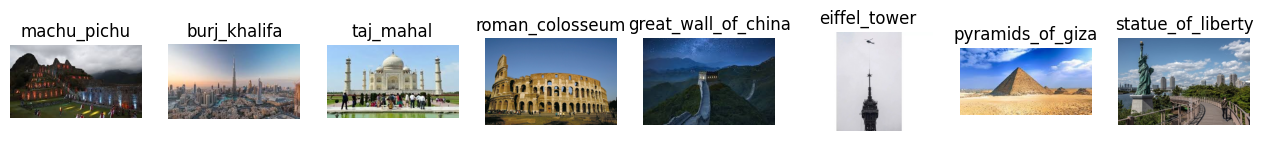

In [22]:
#Visualizing sample images from some of the folders of the images from each class to inspect visual consistency
plt.figure(figsize=(16, 18))
for i, class_name in enumerate(classes[:8]):  # Adjust to visualize more classes
    class_path = os.path.join(dataset_path, class_name)
    sample_image_path = os.path.join(class_path, os.listdir(class_path)[0])  # First image
    img = Image.open(sample_image_path)
    plt.subplot(1, 8, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.show()

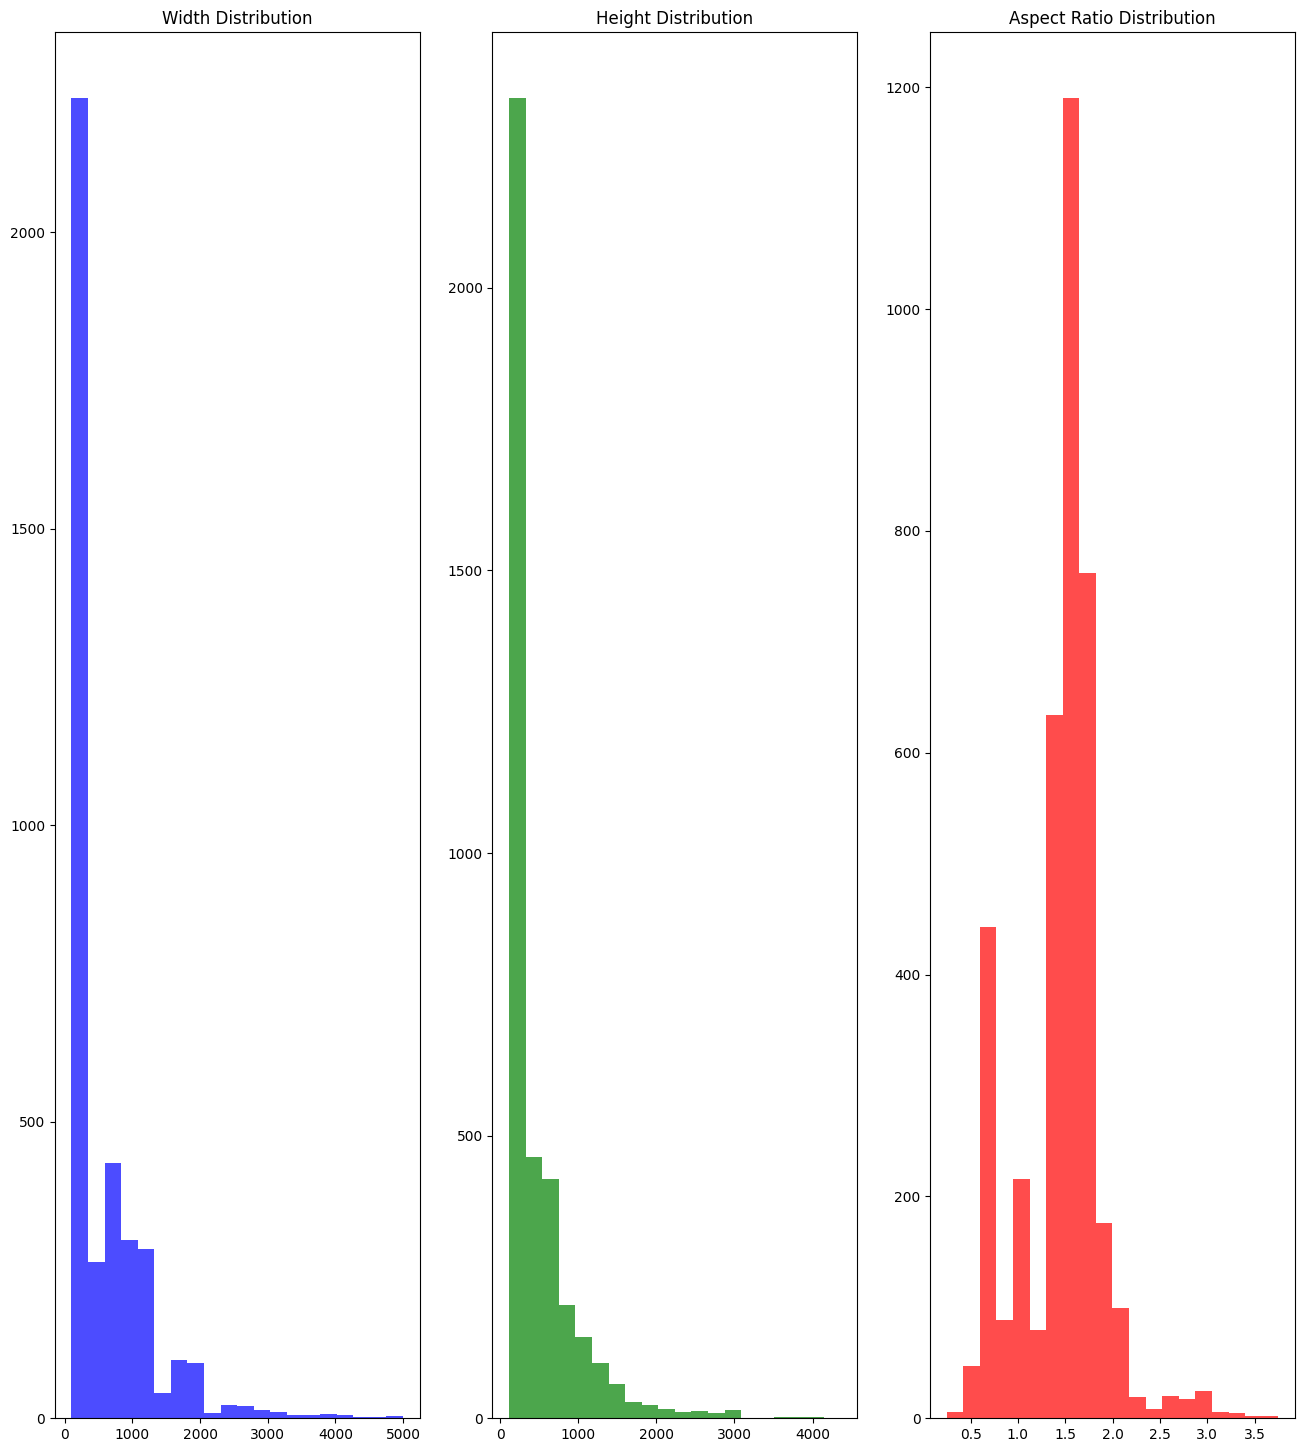

In [23]:
#Now we are going to check for variation in image sizes and aspect ratios
image_shapes = []
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        with Image.open(image_path) as img:
            image_shapes.append(img.size)

widths, heights = zip(*image_shapes)
aspect_ratios = np.array(widths) / np.array(heights)

# Plot distributions
plt.figure(figsize=(16, 18))
plt.subplot(1, 3, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Width Distribution')
plt.subplot(1, 3, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Height Distribution')
plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=20, color='red', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.show()

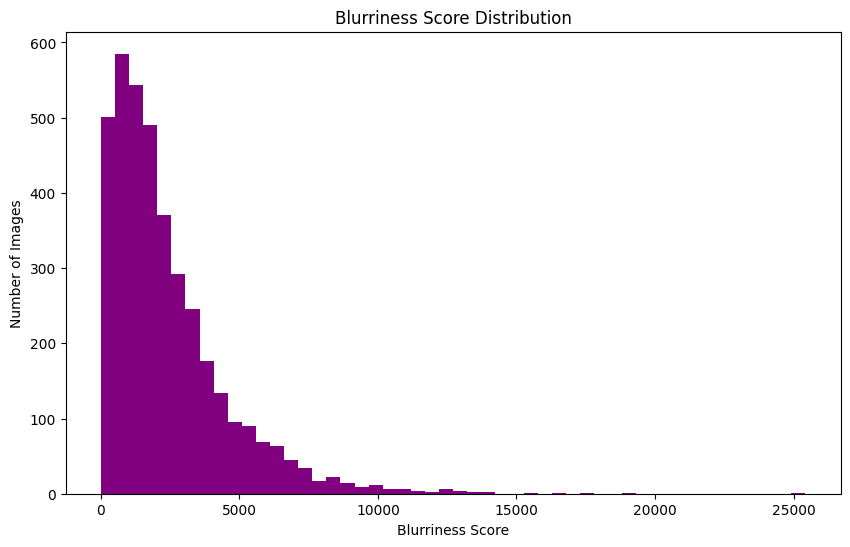

In [25]:
#Checking for Blurry Imagesdef calculate_blurriness(image_path):
import os
import cv2
import matplotlib.pyplot as plt

# Function to calculate blurriness using variance of Laplacian
def calculate_blurriness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    if img is None:
        return None  # Handle invalid image files
    return cv2.Laplacian(img, cv2.CV_64F).var()

# Initialize list to store blurriness scores
blurriness_scores = []

# Base dataset path (master folder containing subfolders)
dataset_path = "/content/Image_Data/Wonders of World/Wonders of World"

# List all subfolders (classes) in the dataset folder
classes = os.listdir(dataset_path)

# Iterate over each class folder
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)  # Path to the class folder

    # Ensure it's a directory (to skip files accidentally present in the dataset folder)
    if not os.path.isdir(class_path):
        continue

    # Iterate over each image in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)  # Full path to the image

        # Only process valid image files
        if image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            blurriness_score = calculate_blurriness(image_path)
            if blurriness_score is not None:  # Only append valid scores
                blurriness_scores.append(blurriness_score)

# Plotting the blurriness score distribution
plt.figure(figsize=(10, 6))
plt.hist(blurriness_scores, bins=50, color='purple')
plt.title('Blurriness Score Distribution')
plt.xlabel('Blurriness Score')
plt.ylabel('Number of Images')
plt.show()

From the above we can interpret the following :

	Images with Very Low Scores (< 500):**bold text**
These images are likely very blurry. We might want to inspect and potentially exclude these from your dataset, as they could negatively impact your model’s ability to learn.
	Images with Moderate Scores (500–5000):**bold text**
These are likely acceptable in terms of sharpness for training. They might have some blurriness but still retain enough detail for feature extraction.
	Images with High Scores (> 5000):**bold text**
These are likely very sharp images with good detail, which are ideal for training an image classification model.

In [26]:
from sklearn.model_selection import train_test_split
import shutil
import os

# Define paths
base_dir = "/content/Image_Data/Wonders of World/Wonders of World"
train_dir = "/content/Image_Data/Wonders of World/train"
val_dir = "/content/Image_Data/Wonders of World/val"
test_dir = "/content/Image_Data/Wonders of World/test"

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split into train, validation, and test
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files

    # Filter valid image files
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not images:
        print(f"No valid images found in {class_name}")
        continue

    # Split images
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Move files to respective folders
    for folder, split in zip([train_dir, val_dir, test_dir], [train, val, test]):
        class_folder = os.path.join(folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        for img in split:
            try:
                shutil.copy(os.path.join(class_path, img), os.path.join(class_folder, img))
            except Exception as e:
                print(f"Error copying {img} from {class_name}: {e}")

Now, I am going to work on an Image preprocessing for the images

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,   # Normalize pixel values (0-255 -> 0-1)
    rotation_range=20,   # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,     # Shear transformation
    zoom_range=0.2,      # Zoom-in and zoom-out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load the data from directories
train_generator = train_datagen.flow_from_directory(
    "/content/Image_Data/Wonders of World/train",
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

val_generator = val_test_datagen.flow_from_directory(
    "/content/Image_Data/Wonders of World/val",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    "/content/Image_Data/Wonders of World/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2687 images belonging to 12 classes.
Found 578 images belonging to 12 classes.
Found 581 images belonging to 12 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flattening layer
    Flatten(),

    # Print the output shape after flattening
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # Output layer
])

# Display the model summary to check output shapes
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,039,820 (72.63 MB)

 Trainable params: 19,039,820 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

The above is the summary of the neural networks build, summarizing the above we have :Explanation of the Model Summary
	1.	Layer Details:
	•	Each row in the table represents a layer in your model.
	•	Layer Type:
	•	Conv2D: Convolutional layers used to extract spatial features from the image.
	•	MaxPooling2D: Pooling layers used to down-sample feature maps and reduce computational load.
	•	Flatten: Flattens the multidimensional feature maps into a single vector.
	•	Dense: Fully connected layers used for classification.
	•	Dropout: A regularization layer that helps prevent overfitting.
	2.	Output Shape:
	•	Displays the dimensions of the output after each layer. For example:
	•	The first Conv2D outputs feature maps of shape (148, 148, 32) because it applies 32 filters, and the image size is reduced slightly due to the kernel size.
	3.	Parameters (Param #):
	•	Shows the total trainable parameters in each layer.
	•	For instance, the first Conv2D has 896 parameters (calculated as (3*3*3*32) + 32 for kernel weights and biases).
	4.	Total Params:
	•	19,039,820 is the total number of trainable parameters in your model.
	•	This is quite a large model, so training it might take some time, depending on your compute resources.

In [61]:
# Compile the model (make sure to do this before fitting the model)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Now, retrain the model
history = model.fit(
    train_generator,
    epochs=13,  # Number of epochs to train
    validation_data=val_generator,  # Validation data to track progress
    callbacks=[reduce_lr]  # If you are using ReduceLROnPlateau, else remove this line
)

Epoch 1/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 337ms/step - accuracy: 0.1468 - loss: 2.4471 - val_accuracy: 0.2872 - val_loss: 2.0029 - learning_rate: 0.0010
Epoch 2/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.2908 - loss: 2.0322 - val_accuracy: 0.4429 - val_loss: 1.6703 - learning_rate: 0.0010
Epoch 3/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.3753 - loss: 1.8631 - val_accuracy: 0.4723 - val_loss: 1.5911 - learning_rate: 0.0010
Epoch 4/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - accuracy: 0.4399 - loss: 1.7181 - val_accuracy: 0.4394 - val_loss: 1.9069 - learning_rate: 0.0010
Epoch 5/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.4441 - loss: 1.6516 - val_accuracy: 0.5329 - val_loss: 1.4655 - learning_rate: 0.0010
Epoch 6/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - accuracy: 0.5069 - loss: 1.5356 - val_accuracy: 0.5675 - val_loss: 1.4217 - learning_rate: 0.0010
Epoch 7/13
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - accuracy: 0.5188 - loss: 1.

In [65]:
# Evaluate the model on the test data
# Define the test data generator with the same preprocessing as the training data
test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have defined the test directory, set the target size to (150, 150)
test_generator = test_datagen.flow_from_directory(
    '/content/Image_Data/Wonders of World/test',
    target_size=(150, 150),  # Resize to match the model's input size
    batch_size=32,
    class_mode='categorical'
)

# Now, evaluate the model on the resized test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 581 images belonging to 12 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.6221 - loss: 1.1439
Test Loss: 1.1740013360977173
Test Accuracy: 0.6351118683815002


In [66]:
# Check the shape of a sample batch from the test generator
for batch in test_generator:
    print(batch[0].shape)
    break

(32, 150, 150, 3)


In [68]:
#Saving the model

model.save('my_model.keras')